# Project 1: Bangalore Credit Default Analysis

#### Source: Kaggle (via International Institute of Information Technology Bangalore)
#### Link: https://www.kaggle.com/mishra5001/credit-card?select=columns_description.csv

## Part 1: Data Preparation/Wrangling

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import sklearn
import os
import re

In [3]:
os.chdir('/Users/hudsonfinchbatista/Desktop/Python Datasets/Loan Prediction/Defaults/')
data = pd.read_csv('application_data.csv')

In [4]:
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
len(data)

307511

In [6]:
data.isnull().sum().loc[lambda x: x > 10000]

OWN_CAR_AGE                     202929
OCCUPATION_TYPE                  96391
EXT_SOURCE_1                    173378
EXT_SOURCE_3                     60965
APARTMENTS_AVG                  156061
BASEMENTAREA_AVG                179943
YEARS_BEGINEXPLUATATION_AVG     150007
YEARS_BUILD_AVG                 204488
COMMONAREA_AVG                  214865
ELEVATORS_AVG                   163891
ENTRANCES_AVG                   154828
FLOORSMAX_AVG                   153020
FLOORSMIN_AVG                   208642
LANDAREA_AVG                    182590
LIVINGAPARTMENTS_AVG            210199
LIVINGAREA_AVG                  154350
NONLIVINGAPARTMENTS_AVG         213514
NONLIVINGAREA_AVG               169682
APARTMENTS_MODE                 156061
BASEMENTAREA_MODE               179943
YEARS_BEGINEXPLUATATION_MODE    150007
YEARS_BUILD_MODE                204488
COMMONAREA_MODE                 214865
ELEVATORS_MODE                  163891
ENTRANCES_MODE                  154828
FLOORSMAX_MODE           

In [7]:
pattern1 = r'.*\s*(AMT_REQ_CREDIT)\.*'
pattern2 = r'.*\s*(FLAG_DOCUMENT)\.*'
pattern3 = r'.*\s*(MODE|MEDI|AVG)\.*'
pattern4 = r'.*\s*(PHONE|MOBILE|EMAIL)\.*'
pattern5 = r'.*\s*(CIRCLE)\.*'
pattern6 = r'.*\s*(EXT)\.*'

for column in data.columns:
    if re.match(pattern1, column):
        data = data.drop(column,axis=1)
    elif re.match(pattern2, column):
        data = data.drop(column,axis=1)
    elif re.match(pattern3, column):
        data = data.drop(column,axis=1)
    elif re.match(pattern4, column):
        data = data.drop(column,axis=1)
    elif re.match(pattern5, column):
        data = data.drop(column,axis=1)
    elif re.match(pattern6, column):
        data = data.drop(column,axis=1)
        
len(data.columns)

36

In [8]:
data.isnull().sum()

SK_ID_CURR                          0
TARGET                              0
NAME_CONTRACT_TYPE                  0
CODE_GENDER                         0
FLAG_OWN_CAR                        0
FLAG_OWN_REALTY                     0
CNT_CHILDREN                        0
AMT_INCOME_TOTAL                    0
AMT_CREDIT                          0
AMT_ANNUITY                        12
AMT_GOODS_PRICE                   278
NAME_TYPE_SUITE                  1292
NAME_INCOME_TYPE                    0
NAME_EDUCATION_TYPE                 0
NAME_FAMILY_STATUS                  0
NAME_HOUSING_TYPE                   0
REGION_POPULATION_RELATIVE          0
DAYS_BIRTH                          0
DAYS_EMPLOYED                       0
DAYS_REGISTRATION                   0
DAYS_ID_PUBLISH                     0
OWN_CAR_AGE                    202929
FLAG_MOBIL                          0
OCCUPATION_TYPE                 96391
CNT_FAM_MEMBERS                     2
REGION_RATING_CLIENT                0
REGION_RATIN

In [9]:
data = data[data.columns[~data.columns.isin(['OWN_CAR_AGE','OCCUPATION_TYPE'])]]

In [10]:
data['AMT_ANNUITY'].fillna(data['AMT_ANNUITY'].mean(),inplace=True)
data['AMT_GOODS_PRICE'].fillna(data['AMT_GOODS_PRICE'].mean(),inplace=True)
data['CNT_FAM_MEMBERS'].fillna(data['CNT_FAM_MEMBERS'].mean(),inplace=True)

In [11]:
data['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [12]:
suite_list = ['Unaccompanied','Family','Spouse, partner', 'Children','Other_B', 'Other_A', 'Group of people']

for i, rowseries in data.iterrows():
    if pd.isnull(data.at[i,'NAME_TYPE_SUITE']):
        data.at[i,'NAME_TYPE_SUITE'] = np.random.choice(suite_list)

In [13]:
data.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
REG_REGION_NOT_LIVE_REGION     0
REG_REGION_NOT_WORK_REGION     0
LIVE_REGION_NOT_WORK_REGION    0
REG_CITY_N

In [14]:
data.dtypes

SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                  int64
FLAG_MOBIL                       int64
CNT_FAM_MEMBERS                float64
REGION_RATING_CLIENT             int64
REGION_RATING_CLIENT_W_CITY      int64
WEEKDAY_APPR_PROCESS_STAR

In [15]:
data = data.drop('SK_ID_CURR',axis=1)
data.describe()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY
count,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307511.000000,3.075110e+05,307511.000000,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,...,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555
std,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.454517,3.692794e+05,0.013831,4363.988632,141275.766519,3522.886321,...,0.910679,0.509034,0.502737,3.265832,0.122126,0.219526,0.197499,0.268444,0.421124,0.383817
min,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,-24672.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,-7479.500000,...,2.000000,2.000000,2.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,-4504.000000,...,2.000000,2.000000,2.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,-2010.000000,...,3.000000,2.000000,2.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,0.000000,...,20.000000,3.000000,3.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
data['DAYS_BIRTH'] = data['DAYS_BIRTH'].abs()
data['DAYS_EMPLOYED'] = data['DAYS_EMPLOYED'].abs()
data['DAYS_REGISTRATION'] = data['DAYS_REGISTRATION'].abs()
data['DAYS_ID_PUBLISH'] = data['DAYS_ID_PUBLISH'].abs()

In [17]:
data['DAYS_BIRTH'].value_counts()

13749    43
13481    42
10020    41
18248    41
15771    40
         ..
7861      1
25017     1
25135     1
7856      1
24328     1
Name: DAYS_BIRTH, Length: 17460, dtype: int64

In [18]:
data2 = data[['TARGET','NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','CNT_CHILDREN',
             'AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','NAME_TYPE_SUITE','NAME_INCOME_TYPE',
             'NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','DAYS_BIRTH','DAYS_EMPLOYED']]

In [19]:
data2['DAYS_BIRTH'] = data2['DAYS_BIRTH']//365
data2 = data2.rename({'DAYS_BIRTH': 'AGE'},axis=1)

<ipython-input-19-cf2ad948e551>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['DAYS_BIRTH'] = data2['DAYS_BIRTH']//365


In [20]:
data2['AGE'].value_counts()

38    8873
37    8799
39    8770
40    8624
36    8614
27    8476
41    8449
31    8377
43    8308
42    8216
28    7975
32    7911
44    7819
30    7806
35    7804
33    7714
29    7670
34    7631
54    7551
53    7457
46    7293
45    7205
47    7018
48    6984
56    6828
57    6768
52    6763
51    6689
55    6637
59    6631
49    6627
50    6482
58    6268
60    6227
62    5514
61    5418
63    5197
64    5117
26    4561
25    4168
23    4057
24    3905
65    3113
22    2933
66    2085
67    2042
21    1254
68     866
69      16
20       1
Name: AGE, dtype: int64

In [21]:
data2['DAYS_EMPLOYED'].value_counts()

365243    55374
200         156
224         152
199         151
230         151
          ...  
11555         1
14832         1
14719         1
13344         1
10893         1
Name: DAYS_EMPLOYED, Length: 12574, dtype: int64

In [22]:
data2['DAYS_EMPLOYED'] = data2['DAYS_EMPLOYED']//365
data2 = data2.rename({'DAYS_EMPLOYED': 'YEARS_EMPLOYED'},axis=1)

In [23]:
data2['YEARS_EMPLOYED'].value_counts()

1000    55374
1       31841
2       29648
0       27904
3       25107
4       21767
5       16271
6       15051
7       13148
8       11440
9        8980
10       7364
11       5902
12       5309
14       4643
13       4349
15       2725
16       2335
17       2006
18       1918
19       1871
20       1600
21       1461
22       1253
23       1016
24        914
25        821
27        656
26        653
28        611
29        567
30        457
31        437
34        364
32        351
33        331
35        257
36        196
37        138
39        125
38        116
40         59
41         59
42         42
44         31
43         19
45         14
48          4
46          4
49          1
47          1
Name: YEARS_EMPLOYED, dtype: int64

In [24]:
for i, rowseries in data2.iterrows():
    if data2.at[i,'YEARS_EMPLOYED'] == 1000:
        data2.at[i,'YEARS_EMPLOYED'] = np.random.randint(50)

In [25]:
data2['YEARS_EMPLOYED'].value_counts()

1     32905
2     30722
0     29031
3     26236
4     22833
5     17388
6     16163
7     14257
8     12575
9     10060
10     8515
11     6944
12     6489
14     5742
13     5467
15     3848
16     3410
17     3054
18     3042
19     2956
20     2701
21     2582
22     2395
23     2139
24     2020
25     1922
27     1797
26     1794
28     1764
29     1690
31     1539
32     1528
30     1515
34     1478
33     1414
35     1357
36     1332
38     1264
39     1256
37     1236
40     1176
45     1146
42     1130
44     1115
49     1114
47     1104
48     1101
43     1095
41     1086
46     1084
Name: YEARS_EMPLOYED, dtype: int64

## Part 2: EDA

In [26]:
data2['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [27]:
data2['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [28]:
data2 = data2[data2['CODE_GENDER'] != 'XNA']
data2['CODE_GENDER'].value_counts()

F    202448
M    105059
Name: CODE_GENDER, dtype: int64

In [29]:
data2['FLAG_OWN_CAR'].value_counts()

N    202922
Y    104585
Name: FLAG_OWN_CAR, dtype: int64

In [30]:
data2['FLAG_OWN_REALTY'].value_counts()

Y    213308
N     94199
Name: FLAG_OWN_REALTY, dtype: int64

In [31]:
data2.groupby(['CODE_GENDER','TARGET']).size().reset_index(name='COUNT')

,CODE_GENDER,TARGET,COUNT
0,F,0,188278
1,F,1,14170
2,M,0,94404
3,M,1,10655


In [32]:
data2.groupby(['FLAG_OWN_CAR','TARGET']).size().reset_index(name='COUNT')

,FLAG_OWN_CAR,TARGET,COUNT
0,N,0,185673
1,N,1,17249
2,Y,0,97009
3,Y,1,7576


In [33]:
data2.groupby(['FLAG_OWN_REALTY','TARGET']).size().reset_index(name='COUNT')

,FLAG_OWN_REALTY,TARGET,COUNT
0,N,0,86357
1,N,1,7842
2,Y,0,196325
3,Y,1,16983


In [34]:
data2.groupby(['NAME_INCOME_TYPE','TARGET']).size().reset_index(name='COUNT')

,NAME_INCOME_TYPE,TARGET,COUNT
0,Businessman,0,10
1,Commercial associate,0,66256
2,Commercial associate,1,5360
3,Maternity leave,0,3
4,Maternity leave,1,2
5,Pensioner,0,52380
6,Pensioner,1,2982
7,State servant,0,20454
8,State servant,1,1249
9,Student,0,18


In [35]:
data2.groupby(['NAME_EDUCATION_TYPE','TARGET']).size().reset_index(name='COUNT')

,NAME_EDUCATION_TYPE,TARGET,COUNT
0,Academic degree,0,161
1,Academic degree,1,3
2,Higher education,0,70853
3,Higher education,1,4009
4,Incomplete higher,0,9404
5,Incomplete higher,1,872
6,Lower secondary,0,3399
7,Lower secondary,1,417
8,Secondary / secondary special,0,198865
9,Secondary / secondary special,1,19524


In [36]:
data2.groupby(['NAME_CONTRACT_TYPE','TARGET']).size().reset_index(name='COUNT')

,NAME_CONTRACT_TYPE,TARGET,COUNT
0,Cash loans,0,255011
1,Cash loans,1,23221
2,Revolving loans,0,27671
3,Revolving loans,1,1604


/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


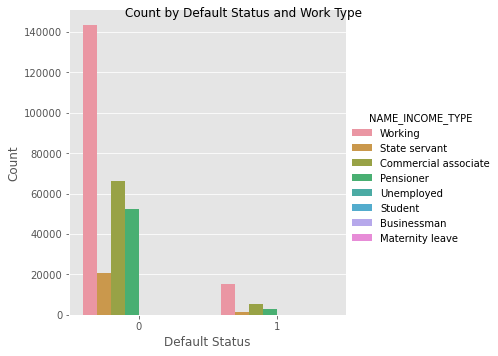

In [40]:
work = sns.factorplot('TARGET', hue = 'NAME_INCOME_TYPE', data=data2, kind='count')
work.fig.suptitle('Count by Default Status and Work Type')
work.set_axis_labels('Default Status', "Count")
plt.show()

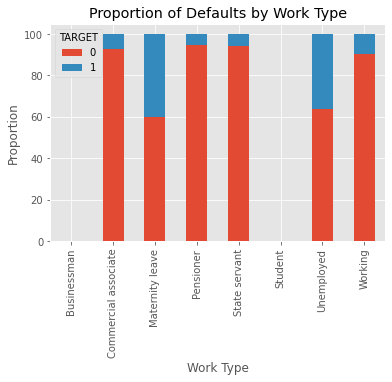

In [42]:
work = data2.groupby(['NAME_INCOME_TYPE','TARGET'])['TARGET'].count()
work = work.unstack()

work2 = work.apply(lambda x: x*100/sum(x),axis=1)

work2.plot(kind='bar', stacked=True,title='Proportion of Defaults by Work Type')
plt.xlabel('Work Type')
plt.ylabel('Proportion')
plt.show()

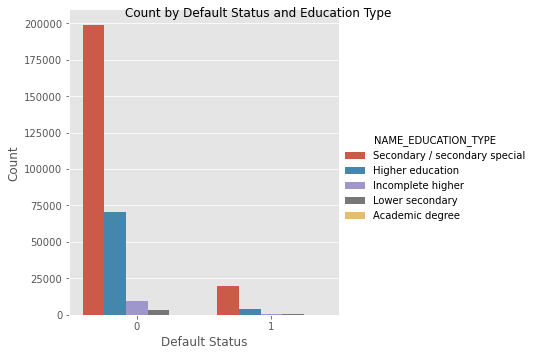

In [43]:
edu = sns.factorplot('TARGET', hue = 'NAME_EDUCATION_TYPE', data=data2, kind='count')
edu.fig.suptitle('Count by Default Status and Education Type')
edu.set_axis_labels('Default Status', "Count")
plt.show()

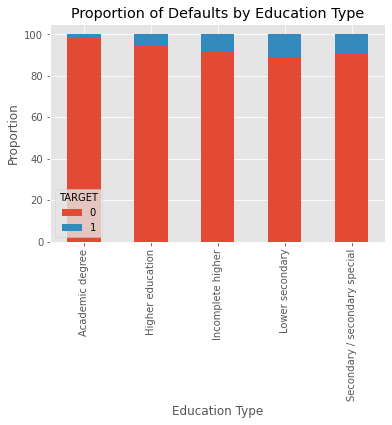

In [44]:
edu = data2.groupby(['NAME_EDUCATION_TYPE','TARGET'])['TARGET'].count()
edu = edu.unstack()

edu2 = edu.apply(lambda x: x*100/sum(x),axis=1)

edu2.plot(kind='bar', stacked=True,title='Proportion of Defaults by Education Type')
plt.xlabel('Education Type')
plt.ylabel('Proportion')
plt.show()

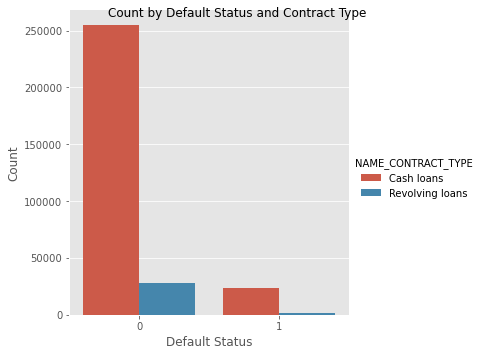

In [45]:
contract = sns.factorplot('TARGET', hue = 'NAME_CONTRACT_TYPE', data=data2, kind='count')
contract.fig.suptitle('Count by Default Status and Contract Type')
contract.set_axis_labels('Default Status', "Count")
plt.show()

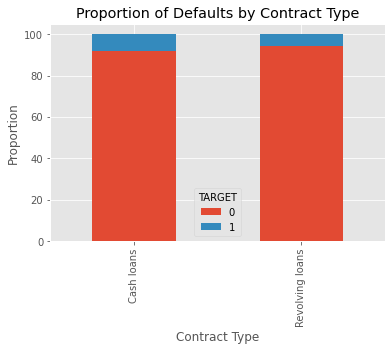

In [46]:
contract = data2.groupby(['NAME_CONTRACT_TYPE','TARGET'])['TARGET'].count()
contract = contract.unstack()

contract2 = contract.apply(lambda x: x*100/sum(x),axis=1)

contract2.plot(kind='bar', stacked=True,title='Proportion of Defaults by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Proportion')
plt.show()

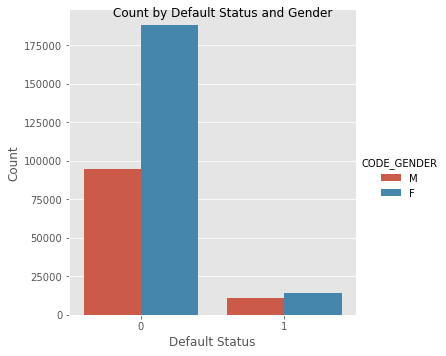

In [47]:
sex = sns.factorplot('TARGET', hue = 'CODE_GENDER', data=data2, kind='count')
sex.fig.suptitle('Count by Default Status and Gender')
sex.set_axis_labels('Default Status', "Count")
plt.show()

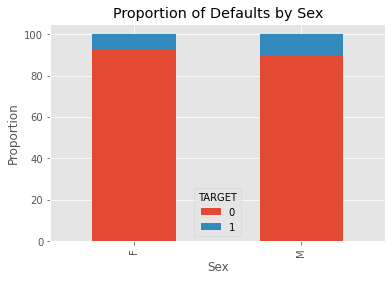

In [92]:
sex = data2.groupby(['CODE_GENDER','TARGET'])['TARGET'].count()
sex = sex.unstack()

sex2 = sex.apply(lambda x: x*100/sum(x),axis=1)

sex2.plot(kind='bar', stacked=True,title='Proportion of Defaults by Sex')
plt.xlabel('Sex')
plt.ylabel('Proportion')
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


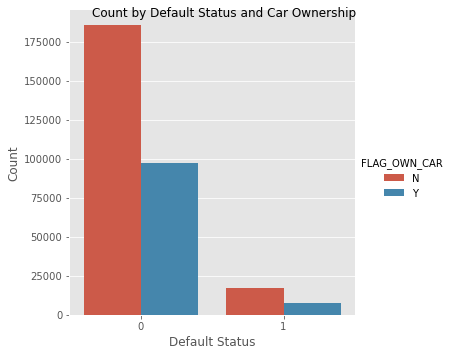

In [93]:
car = sns.factorplot('TARGET', hue = 'FLAG_OWN_CAR', data=data2, kind='count')
car.fig.suptitle('Count by Default Status and Car Ownership')
car.set_axis_labels('Default Status', "Count")
plt.show()

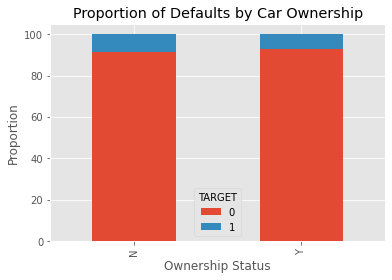

In [94]:
car = data2.groupby(['FLAG_OWN_CAR','TARGET'])['TARGET'].count()
car = car.unstack()

car2 = car.apply(lambda x: x*100/sum(x),axis=1)

car2.plot(kind='bar', stacked=True,title='Proportion of Defaults by Car Ownership')
plt.xlabel('Ownership Status')
plt.ylabel('Proportion')
plt.show()

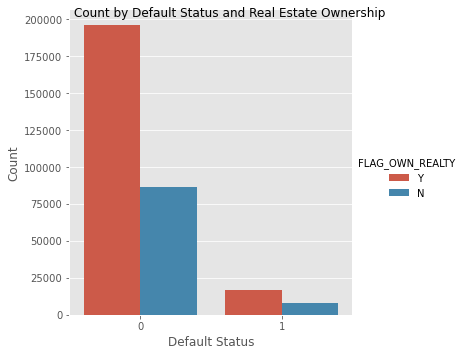

In [95]:
realty = sns.factorplot('TARGET', hue = 'FLAG_OWN_REALTY', data=data2, kind='count')
realty.fig.suptitle('Count by Default Status and Real Estate Ownership')
realty.set_axis_labels('Default Status', "Count")
plt.show()

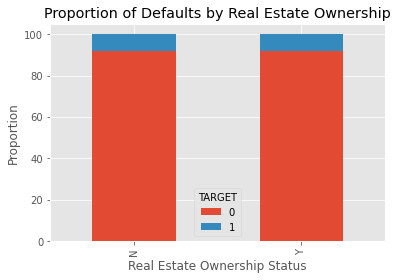

In [96]:
realty = data2.groupby(['FLAG_OWN_REALTY','TARGET'])['TARGET'].count()
realty = realty.unstack()

realty2 = realty.apply(lambda x: x*100/sum(x),axis=1)

realty2.plot(kind='bar', stacked=True,title='Proportion of Defaults by Real Estate Ownership')
plt.xlabel('Real Estate Ownership Status')
plt.ylabel('Proportion')
plt.show()

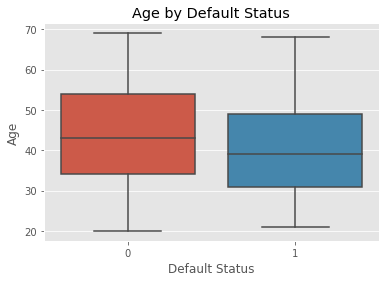

In [48]:
age = sns.boxplot(data = data2,x ='TARGET',y='AGE')
plt.title('Age by Default Status')
plt.ylabel('Age')
plt.xlabel('Default Status')
plt.show()

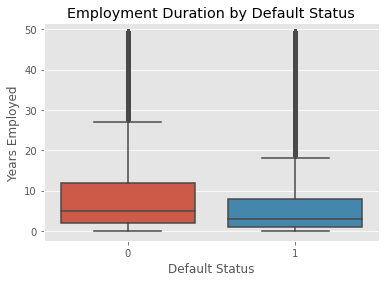

In [49]:
emp = sns.boxplot(data = data2,x ='TARGET',y='YEARS_EMPLOYED')
plt.title('Employment Duration by Default Status')
plt.ylabel('Years Employed')
plt.xlabel('Default Status')
plt.show()

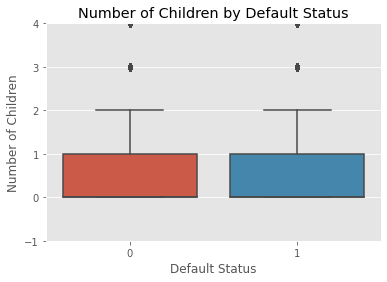

In [50]:
child = sns.boxplot(data = data2,x ='TARGET',y='CNT_CHILDREN')
plt.title('Number of Children by Default Status')
plt.ylabel('Number of Children')
plt.xlabel('Default Status')
plt.ylim([-1,4])
plt.show()

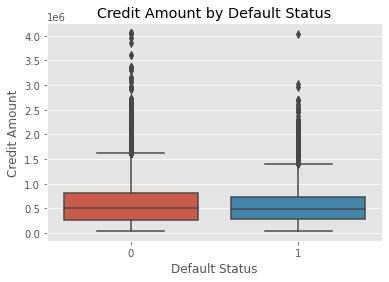

In [51]:
cred = sns.boxplot(data = data2,x ='TARGET',y='AMT_CREDIT')
plt.title('Credit Amount by Default Status')
plt.ylabel('Credit Amount')
plt.xlabel('Default Status')
plt.show()

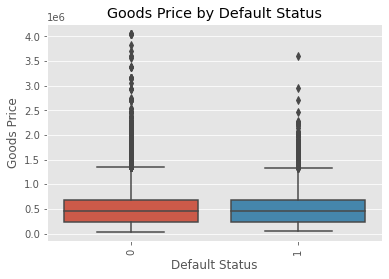

In [52]:
goods = sns.boxplot(data = data2,x ='TARGET',y='AMT_GOODS_PRICE')
plt.title('Goods Price by Default Status')
plt.ylabel('Goods Price')
plt.xlabel('Default Status')
plt.xticks(rotation=90)
plt.show()

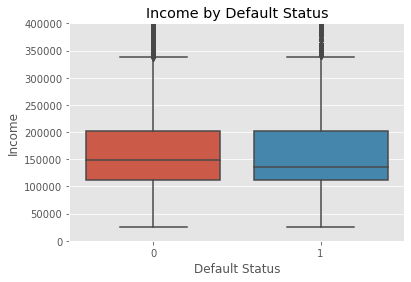

In [53]:
income = sns.boxplot(data = data2,x ='TARGET',y='AMT_INCOME_TOTAL')
plt.title('Income by Default Status')
plt.ylim([0,400000])
plt.ylabel('Income')
plt.xlabel('Default Status')
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


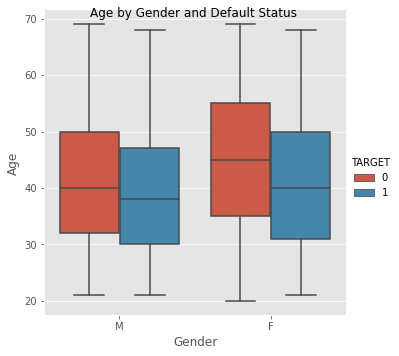

In [54]:
age = sns.factorplot('CODE_GENDER', 'AGE', 'TARGET', data2, kind="box")
age.fig.suptitle('Age by Gender and Default Status')
age.set_axis_labels('Gender', "Age")
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


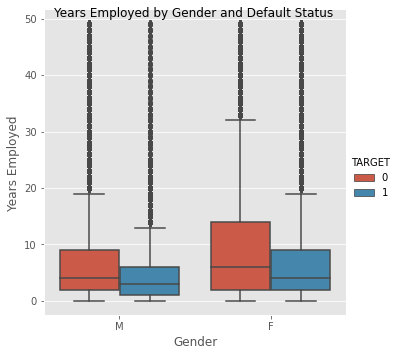

In [55]:
emp = sns.factorplot('CODE_GENDER', 'YEARS_EMPLOYED', 'TARGET', data2, kind="box")
emp.fig.suptitle('Years Employed by Gender and Default Status')
emp.set_axis_labels('Gender', "Years Employed")
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


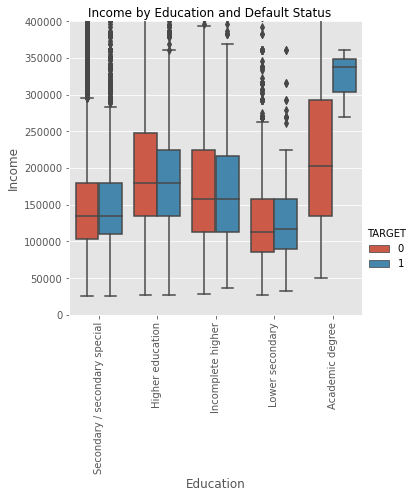

In [56]:
age = sns.factorplot('NAME_EDUCATION_TYPE', 'AMT_INCOME_TOTAL', 'TARGET', data2, kind="box")
age.fig.suptitle('Income by Education and Default Status')
age.set_axis_labels('Education', "Income")
plt.xticks(rotation=90)
plt.ylim([0,400000])
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


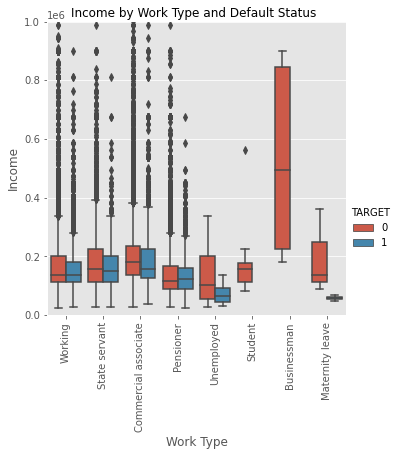

In [57]:
age = sns.factorplot('NAME_INCOME_TYPE', 'AMT_INCOME_TOTAL', 'TARGET', data2, kind="box")
age.fig.suptitle('Income by Work Type and Default Status')
age.set_axis_labels('Work Type', "Income")
plt.xticks(rotation=90)
plt.ylim([0,1000000])
plt.show()

In [58]:
data2['AMT_INCOME_TOTAL'].value_counts()

135000.0    35749
112500.0    31019
157500.0    26555
180000.0    24719
90000.0     22483
            ...  
101119.5        1
79425.0         1
101128.5        1
202275.0        1
262174.5        1
Name: AMT_INCOME_TOTAL, Length: 2548, dtype: int64

In [59]:
data2['AMT_INCOME_TOTAL'].value_counts().loc[lambda x: x>1000]

135000.0    35749
112500.0    31019
157500.0    26555
180000.0    24719
90000.0     22483
225000.0    20698
202500.0    16341
67500.0     11147
270000.0    10827
81000.0      6001
315000.0     5862
247500.0     5343
126000.0     4668
360000.0     4115
121500.0     3848
99000.0      3633
292500.0     3418
103500.0     3330
76500.0      3146
144000.0     3123
171000.0     2647
450000.0     2435
117000.0     2390
54000.0      2319
72000.0      2187
166500.0     2053
45000.0      2043
108000.0     1946
337500.0     1790
94500.0      1747
162000.0     1702
189000.0     1691
405000.0     1660
85500.0      1514
148500.0     1486
216000.0     1406
130500.0     1256
58500.0      1182
63000.0      1145
193500.0     1061
153000.0     1012
Name: AMT_INCOME_TOTAL, dtype: int64

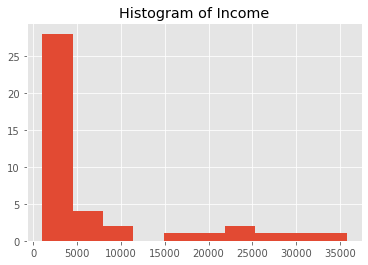

In [60]:
plt.hist(data2['AMT_INCOME_TOTAL'].value_counts().loc[lambda x: x>1000])
plt.title('Histogram of Income')
plt.show()

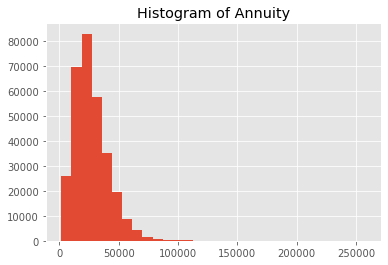

In [61]:
plt.hist(data2['AMT_ANNUITY'],bins=30)
plt.title('Histogram of Annuity')
plt.show()

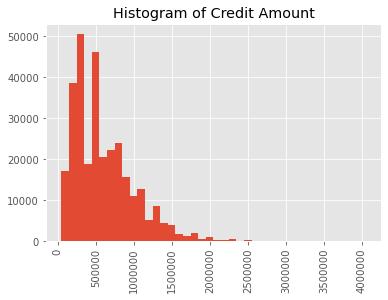

In [62]:
fig, ax = plt.subplots()
ax.hist(data2['AMT_CREDIT'],bins=40)
plt.title('Histogram of Credit Amount')
ax.ticklabel_format(useOffset=False, style='plain')
plt.xticks(rotation=90)
plt.show()

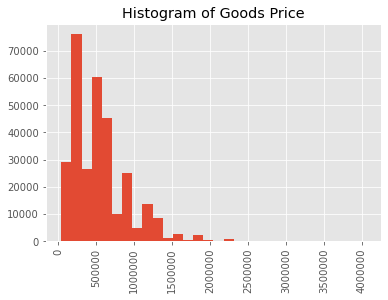

In [63]:
fig, ax = plt.subplots()
ax.hist(data2['AMT_GOODS_PRICE'],bins=30)
plt.title('Histogram of Goods Price')
ax.ticklabel_format(useOffset=False, style='plain')
plt.xticks(rotation=90)
plt.show()

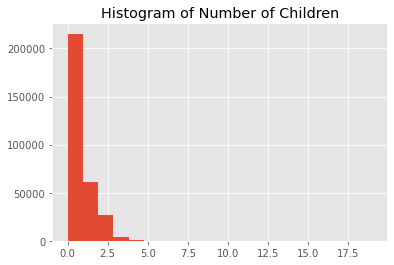

In [64]:
plt.hist(data2['CNT_CHILDREN'],bins=20)
plt.title('Histogram of Number of Children')
plt.show()

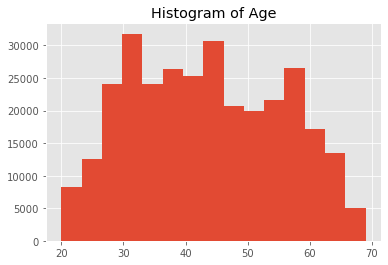

In [65]:
plt.hist(data2['AGE'],bins=15)
plt.title('Histogram of Age')
plt.show()

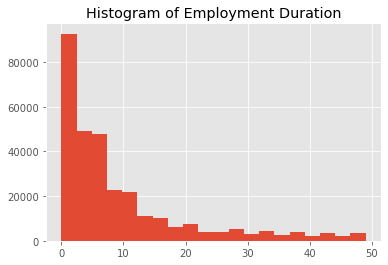

In [66]:
plt.hist(data2['YEARS_EMPLOYED'],bins=20)
plt.title('Histogram of Employment Duration')
plt.show()

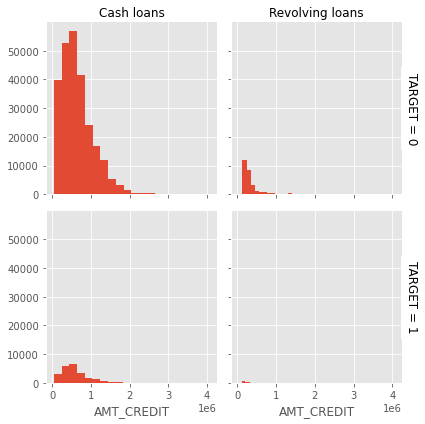

In [67]:
grid1 = sns.FacetGrid(data2, row='TARGET', col='NAME_CONTRACT_TYPE', margin_titles=True)
grid1.map(plt.hist, 'AMT_CREDIT', bins=20);
grid1.set_titles(col_template = '{col_name}')
plt.tight_layout()

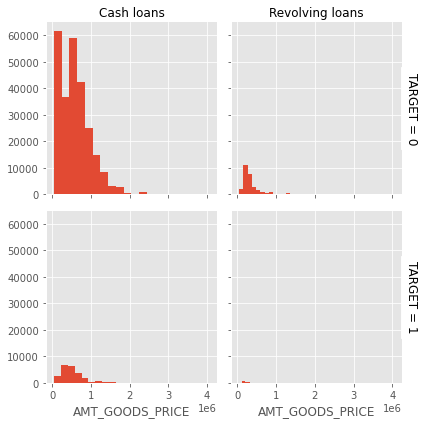

In [68]:
grid1 = sns.FacetGrid(data2, row='TARGET', col='NAME_CONTRACT_TYPE', margin_titles=True)
grid1.map(plt.hist, 'AMT_GOODS_PRICE', bins=20);
grid1.set_titles(col_template = '{col_name}')
plt.tight_layout()

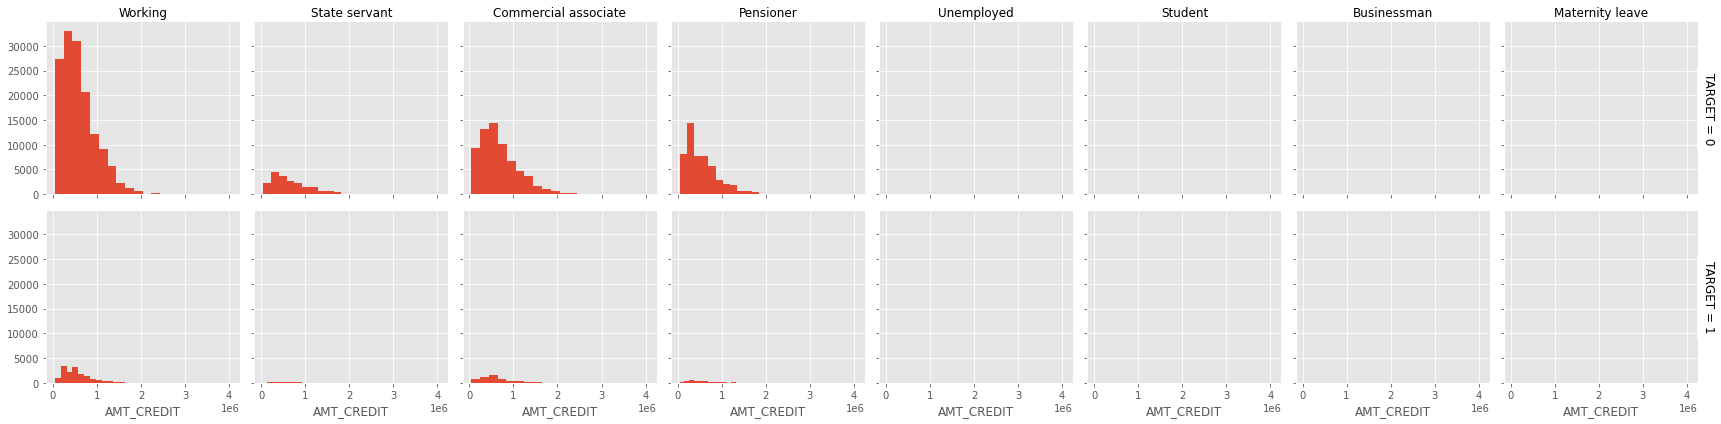

In [69]:
grid1 = sns.FacetGrid(data2, row='TARGET', col='NAME_INCOME_TYPE', margin_titles=True)
grid1.map(plt.hist, 'AMT_CREDIT', bins=20);
grid1.set_titles(col_template = '{col_name}')
plt.tight_layout()

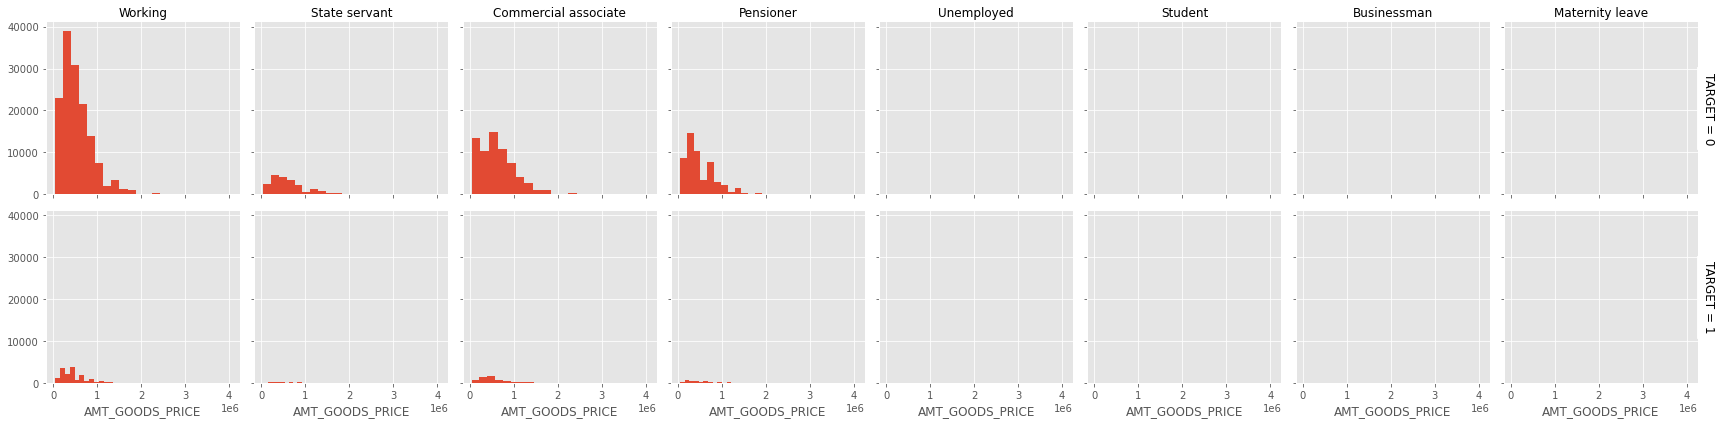

In [70]:
grid1 = sns.FacetGrid(data2, row='TARGET', col='NAME_INCOME_TYPE', margin_titles=True)
grid1.map(plt.hist, 'AMT_GOODS_PRICE', bins=20);
grid1.set_titles(col_template = '{col_name}')
plt.tight_layout()

## Part 3: Non-parametric Inference

In [71]:
num_samples = int(len(data)*(0.1))
num_samples

30751

In [72]:
boot1_meds = []

for i in range(30000):
    boot_sample1 = np.random.choice(data2['AGE'],num_samples)
    boot1_meds.append(np.median(boot_sample1))
    
med_age = np.median(boot1_meds)
std_age = np.std(boot1_meds)

In [73]:
print('bootstrapped median age: ' + str(med_age) + '\n' +
     'actual median age: ' + str(np.median(data2['AGE'])) + '\n' +
     'bootsrapped standard error age: ' + str(std_age) + '\n' +
      'actual standard error age: ' + str(np.std(data2['AGE'])/np.sqrt(num_samples)))

bootstrapped median age: 43.0
actual median age: 43.0
bootsrapped standard error age: 0.2920604484615395
actual standard error age: 0.06817166352097741


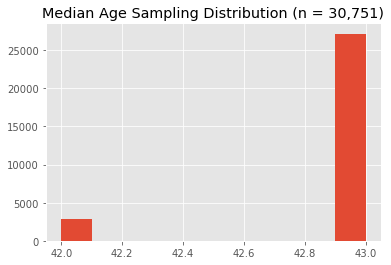

In [74]:
plt.hist(boot1_meds)
plt.title('Median Age Sampling Distribution (n = 30,751)')
plt.show()

In [75]:
boot1_meds = []

for i in range(10000):
    boot_sample1 = np.random.choice(data2['AGE'],10)
    boot1_meds.append(np.median(boot_sample1))
    
med_age = np.median(boot1_meds)
std_age = np.std(boot1_meds)

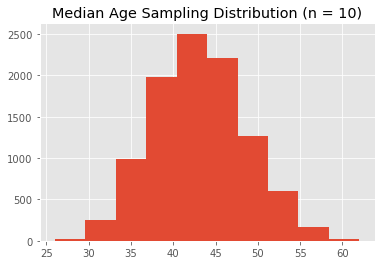

In [76]:
plt.hist(boot1_meds)
plt.title('Median Age Sampling Distribution (n = 10)')
plt.show()

In [77]:
boot2_meds = []

for i in range(30000):
    boot_sample2 = np.random.choice(data2['YEARS_EMPLOYED'],num_samples)
    boot2_meds.append(np.median(boot_sample2))
    
med_emp = np.median(boot2_meds)
std_emp = np.std(boot2_meds)

In [78]:
print('bootstrapped median years employed: ' + str(med_emp) + '\n' +
     'actual median years employed: ' + str(np.median(data2['YEARS_EMPLOYED'])) + '\n'
     'bootstrapped standard error years employed: ' + str(std_emp) + '\n' +
     'actual standard error years employed: ' + str(np.std(data2['YEARS_EMPLOYED'])/np.sqrt(num_samples)))

bootstrapped median years employed: 5.0
actual median years employed: 5.0
bootstrapped standard error years employed: 0.0
actual standard error years employed: 0.06282031215023949


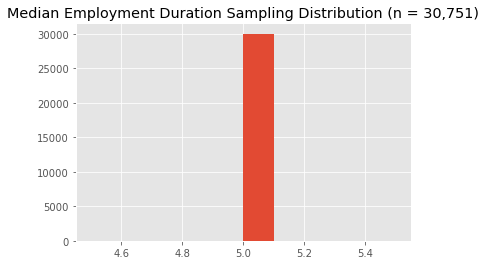

In [79]:
plt.hist(boot2_meds)
plt.title('Median Employment Duration Sampling Distribution (n = 30,751)')
plt.show()

In [80]:
boot2_meds = []

for i in range(10000):
    boot_sample2 = np.random.choice(data2['YEARS_EMPLOYED'],10)
    boot2_meds.append(np.median(boot_sample2))
    
med_emp = np.median(boot2_meds)
std_emp = np.std(boot2_meds)

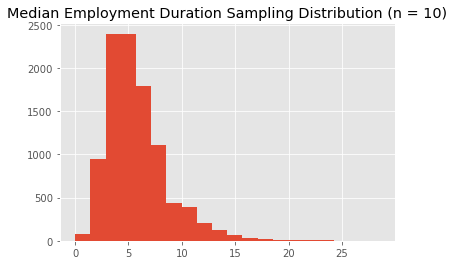

In [81]:
plt.hist(boot2_meds,bins=20)
plt.title('Median Employment Duration Sampling Distribution (n = 10)')
plt.show()

In [82]:
boot3_meds = []

for i in range(30000):
    boot_sample3 = np.random.choice(data2['AMT_CREDIT'],num_samples)
    boot3_meds.append(np.median(boot_sample3))
    
med_cred = np.median(boot3_meds)
std_cred = np.std(boot3_meds)

In [83]:
print('bootstrapped median credit amount: ' + str(med_cred) + '\n' +
     'actual median credit amount: ' + str(np.median(data2['AMT_CREDIT'])) + '\n' +
     'bootstrapped standard error credit amount: ' + str(std_cred) + '\n' +
     'actual standard error credit amount: ' + str(np.std(data2['AMT_CREDIT'])/np.sqrt(num_samples)))

bootstrapped median credit amount: 513531.0
actual median credit amount: 513531.0
bootstrapped standard error credit amount: 3667.703307474419
actual standard error credit amount: 2295.237200976074


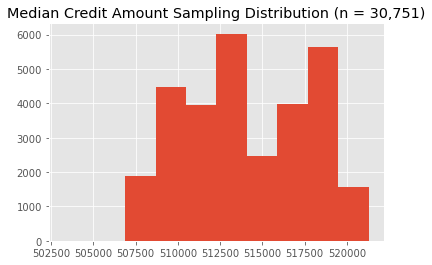

In [84]:
plt.hist(boot3_meds,bins=10)
plt.title('Median Credit Amount Sampling Distribution (n = 30,751)')
plt.show()

In [85]:
boot3_meds = []

for i in range(10000):
    boot_sample3 = np.random.choice(data2['AMT_CREDIT'],10)
    boot3_meds.append(np.median(boot_sample3))
    
med_cred = np.median(boot3_meds)
std_cred = np.std(boot3_meds)

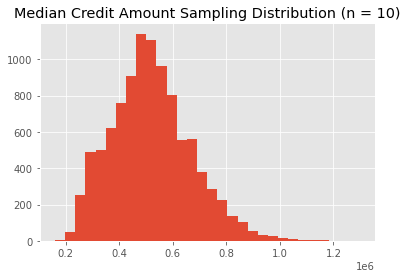

In [86]:
plt.hist(boot3_meds,bins=30)
plt.title('Median Credit Amount Sampling Distribution (n = 10)')
plt.show()

In [87]:
boot4_meds = []

for i in range(30000):
    boot_sample4 = np.random.choice(data2['AMT_GOODS_PRICE'],num_samples)
    boot4_meds.append(np.median(boot_sample4))
    
med_price = np.median(boot4_meds)
std_price = np.std(boot4_meds)

In [88]:
print('bootstrapped median goods price: ' + str(med_price) + '\n' + 
      'actual median goods price: ' + str(np.median(data2['AMT_GOODS_PRICE'])) + "\n" + 
    'bootstrapped standard error goods price: ' + str(std_price) + "\n" +
    'actual standard error goods price: ' + str(np.std(data['AMT_GOODS_PRICE'])/np.sqrt(num_samples)))

bootstrapped median goods price: 450000.0
actual median goods price: 450000.0
bootstrapped standard error goods price: 25.980329097222768
actual standard error goods price: 2105.8371585564173


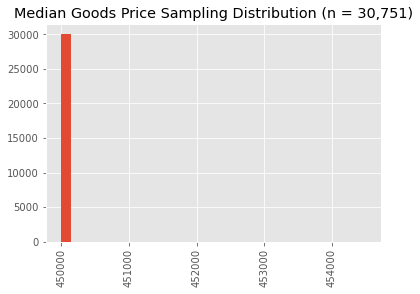

In [89]:
fig, ax = plt.subplots()
ax.hist(boot4_meds,bins=30)
ax.ticklabel_format(useOffset=False, style='plain')
plt.title('Median Goods Price Sampling Distribution (n = 30,751)')
plt.xticks(rotation=90)
plt.show()


In [90]:
boot4_meds = []

for i in range(10000):
    boot_sample4 = np.random.choice(data2['AMT_GOODS_PRICE'],10)
    boot4_meds.append(np.median(boot_sample4))
    
med_price = np.median(boot4_meds)
std_price = np.std(boot4_meds)

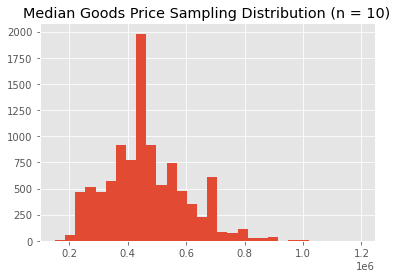

In [91]:
plt.hist(boot4_meds,bins=30)
plt.title('Median Goods Price Sampling Distribution (n = 10)')
plt.show()

In [103]:
data_final = data2[['AGE','AMT_INCOME_TOTAL','YEARS_EMPLOYED','NAME_INCOME_TYPE','CODE_GENDER','NAME_EDUCATION_TYPE']]
features = pd.get_dummies(data_final, prefix = ['CODE_GENDER','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE'], 
                            columns = ['CODE_GENDER','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE'])
labels = data2['TARGET']

In [104]:
features.shape

(307507, 18)

In [105]:
labels.shape

(307507,)

In [106]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(features,labels,test_size=0.25,random_state=4)


In [108]:
x_train.shape

(230630, 18)

In [107]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=4)

X_sm, y_sm = smote.fit_resample(x_train, y_train)

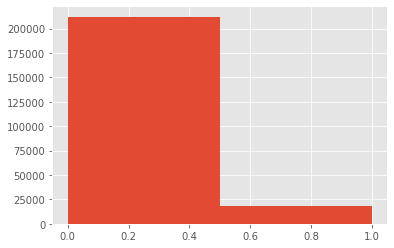

In [109]:
plt.hist(y_train, bins=2)
plt.show()

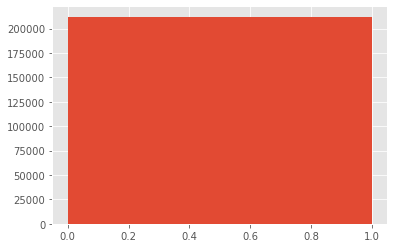

In [110]:
plt.hist(y_sm, bins=2)
plt.show()

In [111]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier

lr = LogisticRegression(solver='liblinear',random_state=4)
lr.fit(X_sm, y_sm)

rf = RandomForestClassifier(n_estimators=50,
                           max_features='sqrt',
                             random_state=4,
                           n_jobs=-1)
rf.fit(X_sm, y_sm)

xgb = XGBClassifier(n_estimators=50,
                   max_depth=10,
                   random_state=4)
xgb.fit(X_sm, y_sm)

estimators = [('log_reg',lr),('random_forest',rf),('grad_boost_machine',xgb)]

final_model = VotingClassifier(estimators, voting='hard')
final_model.fit(X_sm, y_sm)

/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:46:09] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:47:04] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


VotingClassifier(estimators=[('log_reg',
                              LogisticRegression(random_state=4,
                                                 solver='liblinear')),
                             ('random_forest',
                              RandomForestClassifier(max_features='sqrt',
                                                     n_estimators=50, n_jobs=-1,
                                                     random_state=4)),
                             ('grad_boost_machine',
                              XGBClassifier(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=1, gamma=0,
                                            gpu_id=-1, importance_type='gain',
                                            interaction_constraints='',
                                            learning_rate=0.3000000

In [114]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score

pred1 = lr.predict(x_test)
pred2 = rf.predict(x_test)
pred3 = xgb.predict(x_test)
pred4 = final_model.predict(x_test)

preds = [pred1, pred2, pred3, pred4]

for i in range(len(preds)):
    print("Accuracy: ", accuracy_score(y_test,preds[i]))

Accuracy:  0.5037137245209881
Accuracy:  0.7749782119489574
Accuracy:  0.7802723831575114
Accuracy:  0.7600322593233346


In [125]:
for i in range(len(preds)):
    print("ROC AUC: ", roc_auc_score(y_test,preds[i]))

ROC AUC:  0.5706158546303974
ROC AUC:  0.5379128905335566
ROC AUC:  0.5617330485777736
ROC AUC:  0.5630013902194528


In [126]:
for i in range(len(preds)):
    print("F1 Score: ", f1_score(y_test,preds[i]))

F1 Score:  0.17608568898870583
F1 Score:  0.1557757064076912
F1 Score:  0.18238141335914812
F1 Score:  0.18205196417486924


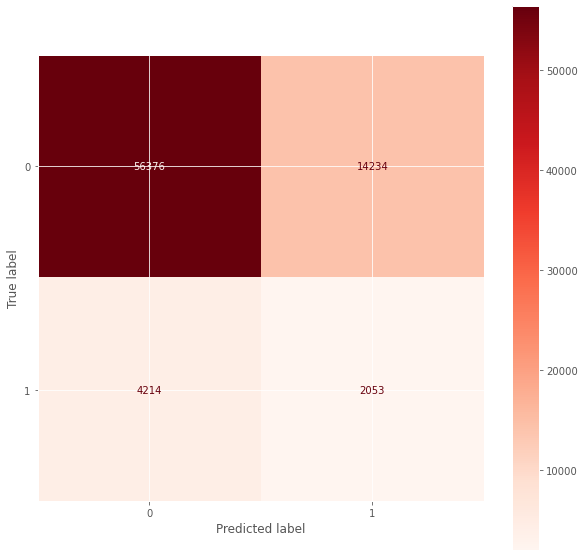

In [116]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import plot_roc_curve

plot_confusion_matrix(final_model, x_test, y_test, cmap=plt.cm.Reds)
fig = plt.gcf()
fig.set_size_inches(10,10)

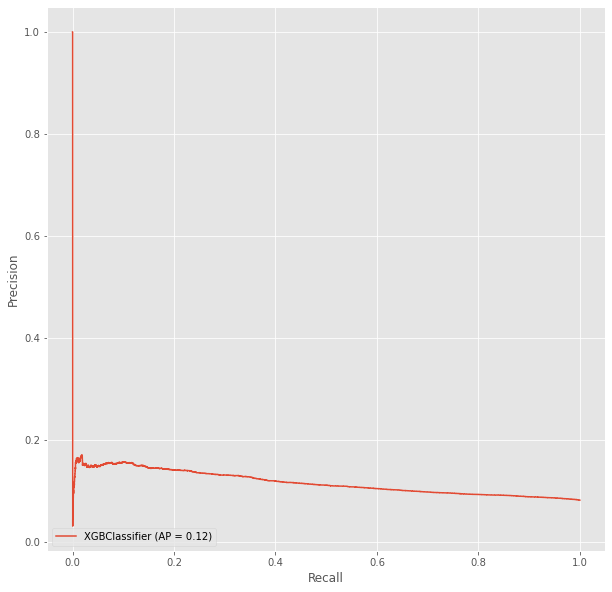

In [122]:
plot_precision_recall_curve(xgb, x_test, y_test)
fig = plt.gcf()
fig.set_size_inches(10,10)

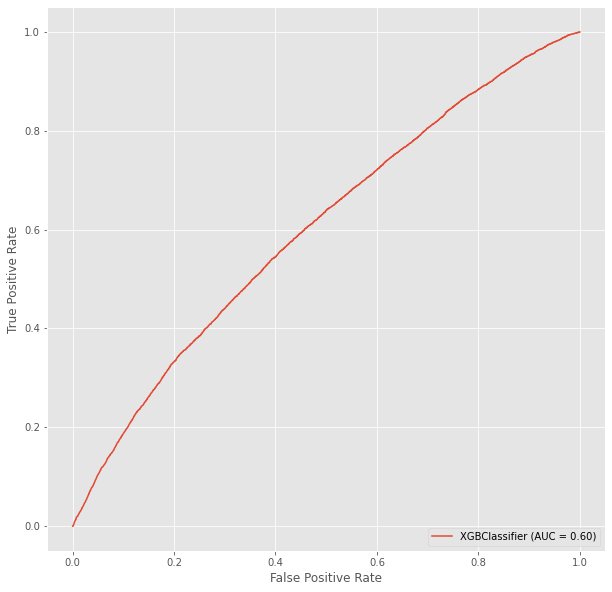

In [124]:
plot_roc_curve(xgb, x_test, y_test)
fig = plt.gcf()
fig.set_size_inches(10,10)